## Estimating Brand Switching Probabilities Using a Markov Chain

In [2]:
import numpy as np
import pandas as pd

# Step 1: Create the transition count matrix
# Rows: From A, B, C
# Columns: To A, B, C
counts = np.array([
    [250, 175, 75],
    [100, 450, 250],
    [50, 100, 50]
])

# Step 2: Calculate row sums
row_sums = counts.sum(axis=1, keepdims=True)

# Step 3: Normalize each row to get transition probabilities
transition_matrix = counts / row_sums

# Step 4: Create a pandas DataFrame for better visualization
brands = ['A', 'B', 'C']
transition_df = pd.DataFrame(transition_matrix, index=brands, columns=brands)

# Print the transition matrix
print("Estimated Transition Matrix (P):")
print(transition_df)

Estimated Transition Matrix (P):
       A       B       C
A  0.500  0.3500  0.1500
B  0.125  0.5625  0.3125
C  0.250  0.5000  0.2500


## Graph Visualization

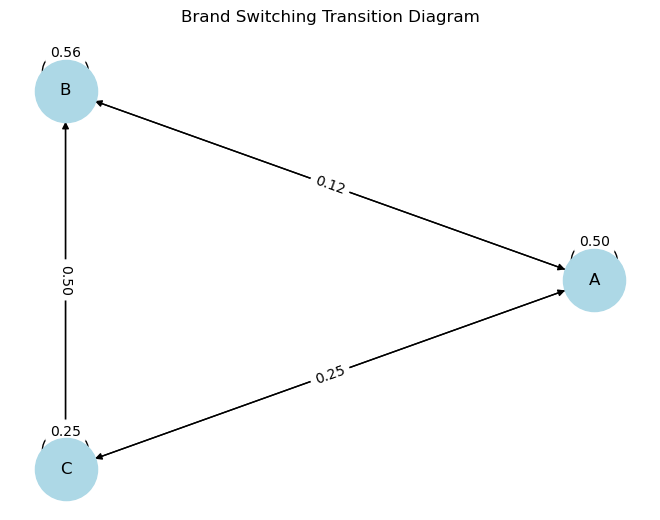

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Define brands and transition matrix (from earlier)
brands = ['A', 'B', 'C']
P = [
    [0.50, 0.35, 0.15],
    [0.125, 0.5625, 0.3125],
    [0.25, 0.5, 0.25]
]

# Create directed graph
G = nx.DiGraph()

# Add edges with transition probabilities as weights
for i, from_brand in enumerate(brands):
    for j, to_brand in enumerate(brands):
        G.add_edge(from_brand, to_brand, weight=round(P[i][j], 3))

# Get edge labels
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Brand Switching Transition Diagram")
plt.show()